# Exercise Week 3
- Dave Schurtenberger
- Luca Kyburz
- Pascal Gansner
- Sofia Horlacher

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL, DecomposeResult

from data import get_random_walk, compact_to_expanded
from utils import stationarity_tests, time_plot

C:\git\time\notebooks\data.py:12: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## 1. Extend lecture 1 & 2 exercises with stationarity analysis

Are the time series stationary?
* Visual inspection
* Statistical tests

### 1.1 Exercise 2: Synthetic Time Series with known components

#### Series 1

In [2]:
seed = 42
n = 200
drift = 0.5
variance = 9
period = 10
amp = 10
seasonal = amp * np.sin(2 * np.pi * np.arange(n) / period)
series_1 = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)

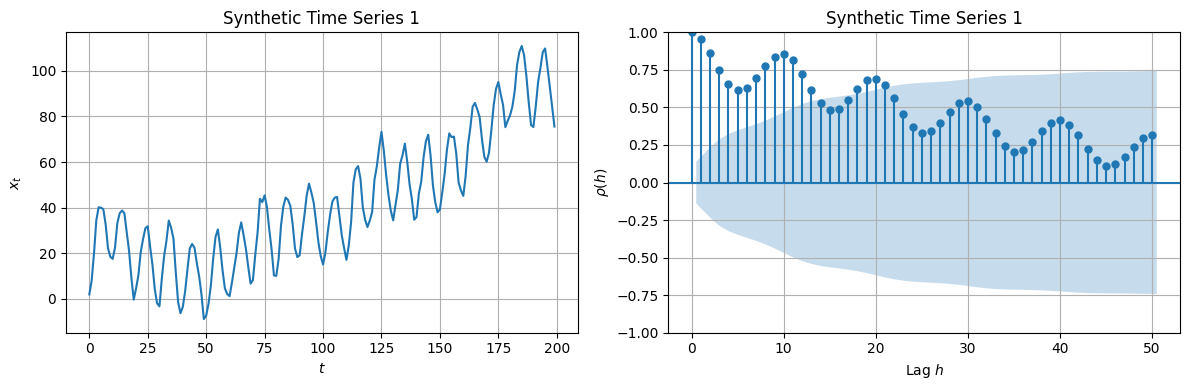

In [3]:
time_plot(np.arange(len(series_1)), series_1, title="Synthetic Time Series 1", with_acf=True, nlags=len(series_1) // 4)

In [4]:
stationarity_tests(series_1)

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.9855)
	- PP: Non-Stationary (p-value: 0.3068)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.4253)


The visual inspection shows a clear trend and seasonal component. The ACF also shows a slow decay, indicating non-stationarity. All statistical tests confirm that the series is non-stationary.

#### Series 2

In [5]:
seed = 42
n = 200
drift = np.concatenate([np.arange(n // 2) * 0.1, (n // 2 - np.arange(n // 2)) * -0.1])
variance = 13
period = 15
amp = 20
seasonal = amp * np.sin(2 * np.pi * np.arange(n) / period)
series_2 = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)

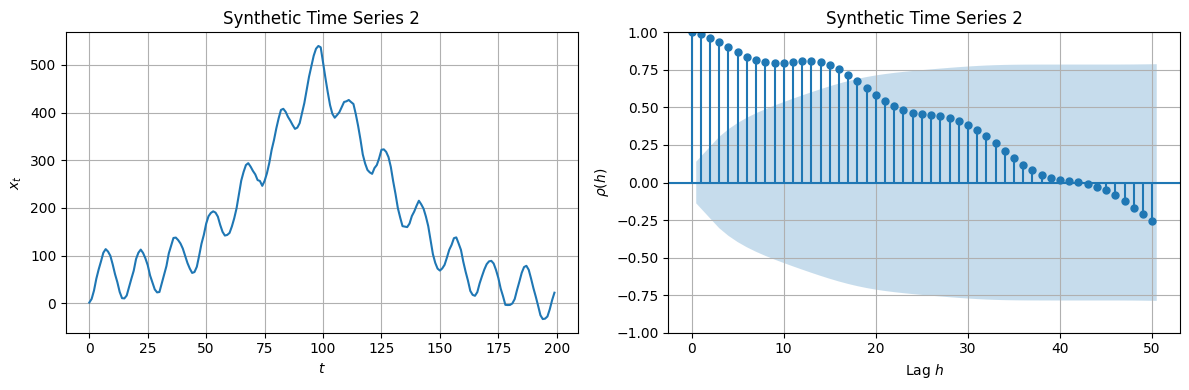

In [6]:
time_plot(np.arange(len(series_2)), series_2, title="Synthetic Time Series 2", with_acf=True, nlags=len(series_2) // 4)

In [7]:
stationarity_tests(series_2)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0373)
	- PP: Non-Stationary (p-value: 0.6994)
	- KPSS: Non-Stationary (p-value: 0.0427)
	- ZA: Non-Stationary (p-value: 0.3288)


Here the visual inspection shows a up-and-down trend and a seasonal component. The ACF also shows a slow decay, indicating non-stationarity. All statistical tests except ADF confirm that the series is non-stationary.

#### Series 3

In [8]:
seed = 42
n = 200
drift = 0.5
variance = 9
period = 5
amp = 10
seasonal = amp * np.sin(10 * np.pi * np.arange(n) / period)
series_3 = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)

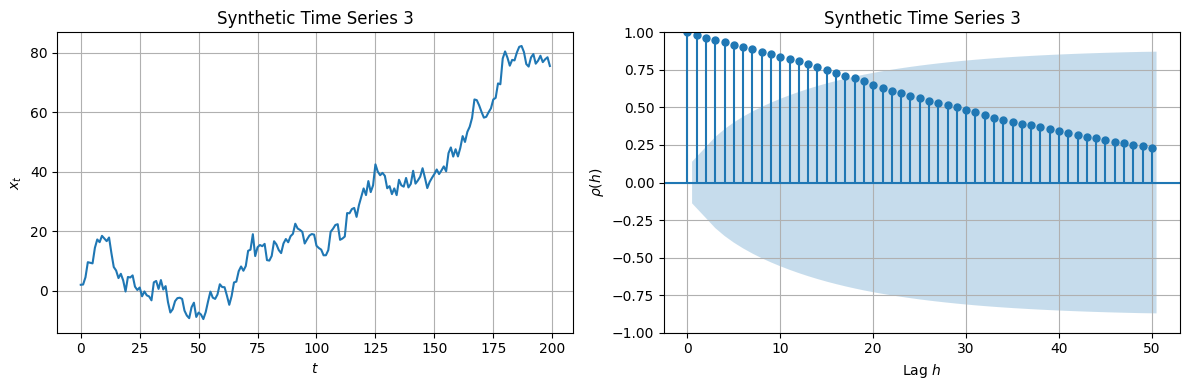

In [9]:
time_plot(np.arange(len(series_3)), series_3, title="Synthetic Time Series 3", with_acf=True, nlags=len(series_3) // 4)

In [10]:
stationarity_tests(series_3)

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.9680)
	- PP: Non-Stationary (p-value: 0.9780)
	- KPSS: Non-Stationary (p-value: 0.0001)
	- ZA: Non-Stationary (p-value: 0.9149)


Again, the visual inspection shows a clear trend, although a seasonal component is not clearly visible. The ACF also shows a slow decay, indicating non-stationarity. All statistical tests confirm that the series is non-stationary.

### 1.2 Exercise 1: Real World Time Series

#### Pandas Refresher

In [11]:
df_pandas_refresher_ise = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx", skiprows=1)
df_pandas_refresher_ise.set_index("date", inplace=True)

C:\git\time\.env3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


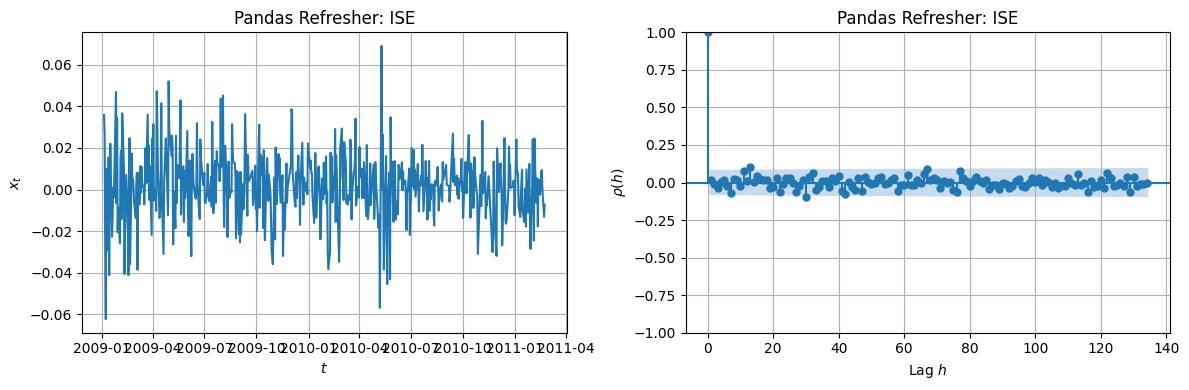

In [12]:
time_plot(df_pandas_refresher_ise.index, df_pandas_refresher_ise['ISE'], title="Pandas Refresher: ISE", with_acf=True, nlags=len(df_pandas_refresher_ise) // 4)

In [13]:
stationarity_tests(df_pandas_refresher_ise['ISE'])

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.2319)
	- ZA: Stationary (p-value: 0.0000)


The visual inspection shows neither a trend, seasonal pattern, break in the data, nor a change in variance which is a solid indication for stationarity. The ACF also shows a quick decay, indicating stationarity. All statistical tests confirm that the series is stationary.

#### Pandas Refresher - Air Quality

In [14]:
df_pandas_refresher_aq = pd.read_csv("01_Exercise/data/94a5-zqnn.csv", sep=",")
# Selecting one location and pm2.5
df_pandas_refresher_aq = df_pandas_refresher_aq.loc[df_pandas_refresher_aq.name=="Monash", ['datetime', 'pm2_5_1_hr']]
df_pandas_refresher_aq.datetime = pd.to_datetime(df_pandas_refresher_aq.datetime, format="%d.%m.%Y %H:%M")
df_pandas_refresher_aq.sort_values("datetime", inplace=True)
df_pandas_refresher_aq.set_index("datetime", inplace=True)
df_pandas_refresher_aq.dropna(inplace=True)
df_pandas_refresher_aq["pm2_5_1_hr"] = df_pandas_refresher_aq["pm2_5_1_hr"].astype(str).str.replace(",", "").astype(float)

C:\Users\d-sbrgr\AppData\Local\Temp\ipykernel_20012\1104760375.py:1: DtypeWarning: Columns (8,9,10,11,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas_refresher_aq = pd.read_csv("01_Exercise/data/94a5-zqnn.csv", sep=",")


In [15]:
# Use just an extract for visibility
df_pandas_refresher_aq = df_pandas_refresher_aq.iloc[:600]

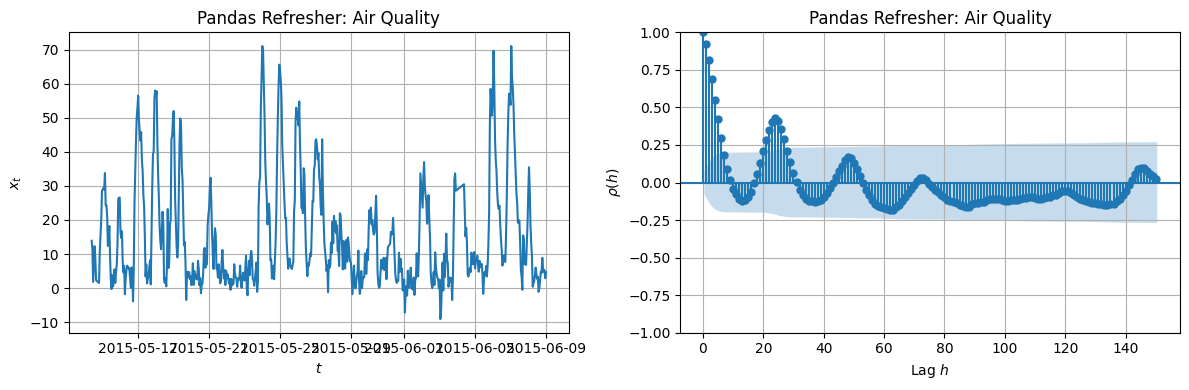

In [16]:
time_plot(df_pandas_refresher_aq.index, df_pandas_refresher_aq['pm2_5_1_hr'], title="Pandas Refresher: Air Quality", with_acf=True, nlags=len(df_pandas_refresher_aq) // 4)

In [17]:
stationarity_tests(df_pandas_refresher_aq['pm2_5_1_hr'])

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0004)
	- KPSS: Stationary (p-value: 0.5846)
	- ZA: Stationary (p-value: 0.0000)


The visual inspection shows a somewhat cyclic pattern but no trend in the data. The ACF also shows a quick decay, but a cyclic decay afterwards, which indicates weak stationarity. All statistical tests back this up, therefore the series is stationary.

#### Handling Missing Values: Energy Consumption

In [18]:
block_df = pd.read_parquet("01_Exercise/data/london_smart_meters/preprocessed/london_smart_meters_merged_block_0-7.parquet")
exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption', static_cols = [], time_varying_cols = [], ts_identifier = "LCLid")
# Use the same data as in the notebook from exercise 1
df_missing_values_energy_consumption = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index("timestamp")
df_missing_values_energy_consumption.ffill()
# Analyze a short window of days for visibility
window =  slice("2012-10-06", "2012-10-10")
df_missing_values_energy_consumption = df_missing_values_energy_consumption[window]

100%|██████████| 50/50 [00:00<00:00, 792.53it/s]


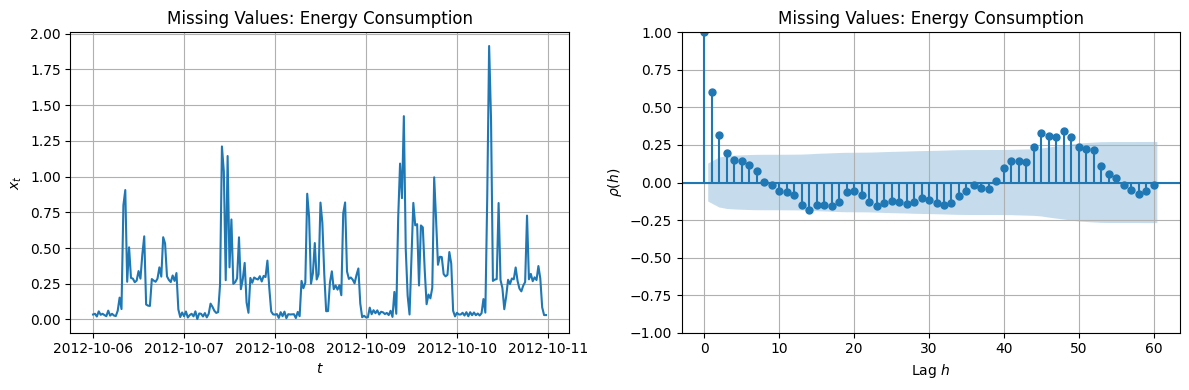

In [19]:
time_plot(df_missing_values_energy_consumption.index, df_missing_values_energy_consumption['energy_consumption'], title="Missing Values: Energy Consumption", with_acf=True, nlags=len(df_missing_values_energy_consumption) // 4)

In [20]:
stationarity_tests(df_missing_values_energy_consumption['energy_consumption'])

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.3671)
	- ZA: Stationary (p-value: 0.0000)


The visual inspection shows a clear daily pattern, but no trend in the data. The ACF also shows a quick decay, but a cyclic decay afterwards, which indicates weak stationarity. All statistical tests back this up, therefore the series is stationary.

## 2. Make the time series stationary
* Experiment with non-linear transformations.
* Experiment with decomposition.
* Experiment with differencing.

#### Series 1

In [21]:
series_1_decomposed: DecomposeResult = STL(series_1, period=10).fit()

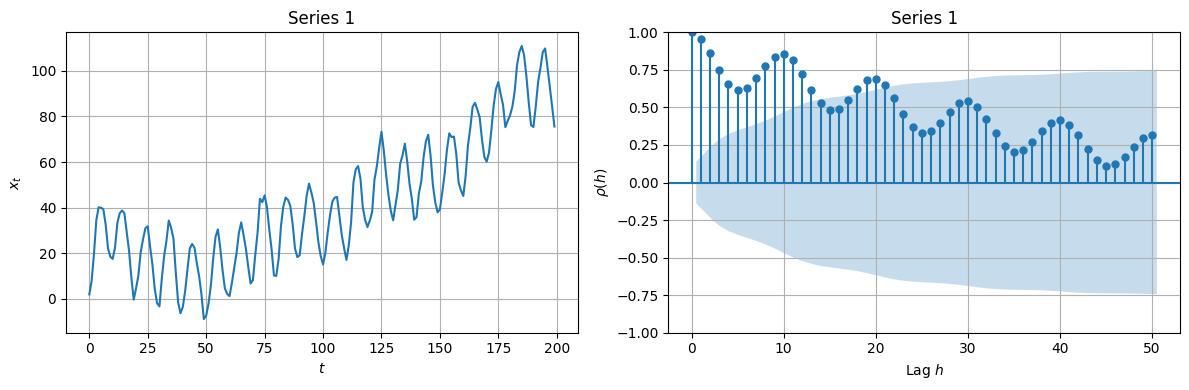

In [22]:
time_plot(np.arange(len(series_1)), series_1, title="Series 1", with_acf=True, nlags=len(series_1) // 4)

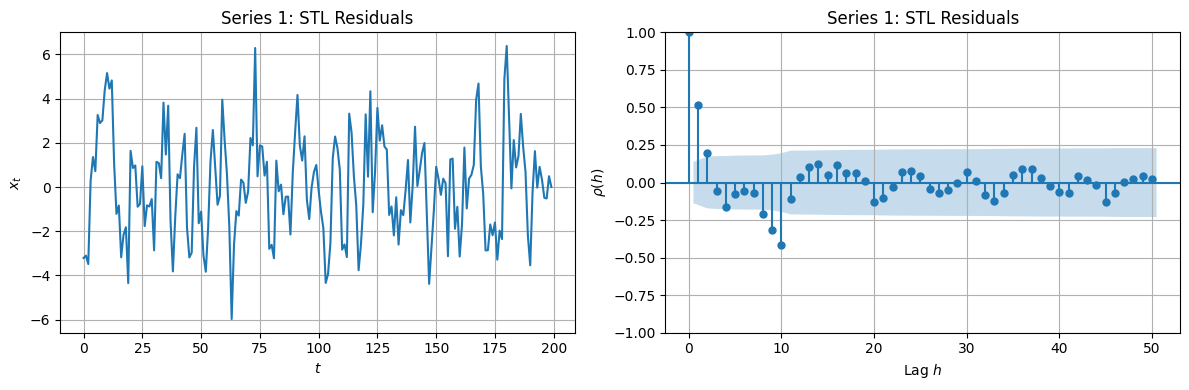

In [23]:
time_plot(np.arange(len(series_1_decomposed.resid)), series_1_decomposed.resid, title="Series 1: STL Residuals", with_acf=True, nlags=len(series_1_decomposed.resid) // 4)

In [24]:
stationarity_tests(series_1_decomposed.resid)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9865)
	- ZA: Stationary (p-value: 0.0065)


Using STL decomposition, we can extract the residuals which appear weakly stationary both visually and according to the ACF. All statistical tests confirm that the residuals are stationary.

#### Series 2

In [25]:
series_2_decomposed: DecomposeResult = STL(series_2, period=15).fit()

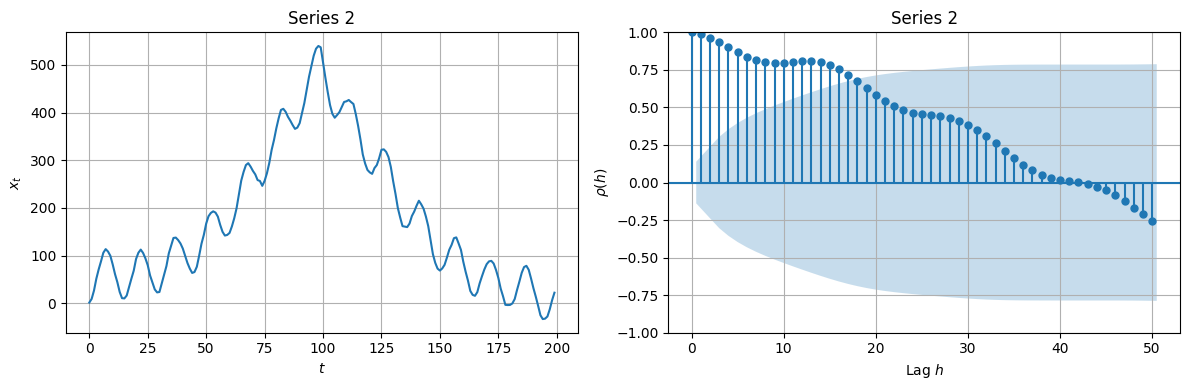

In [26]:
time_plot(np.arange(len(series_2)), series_2, title="Series 2", with_acf=True, nlags=len(series_2) // 4)

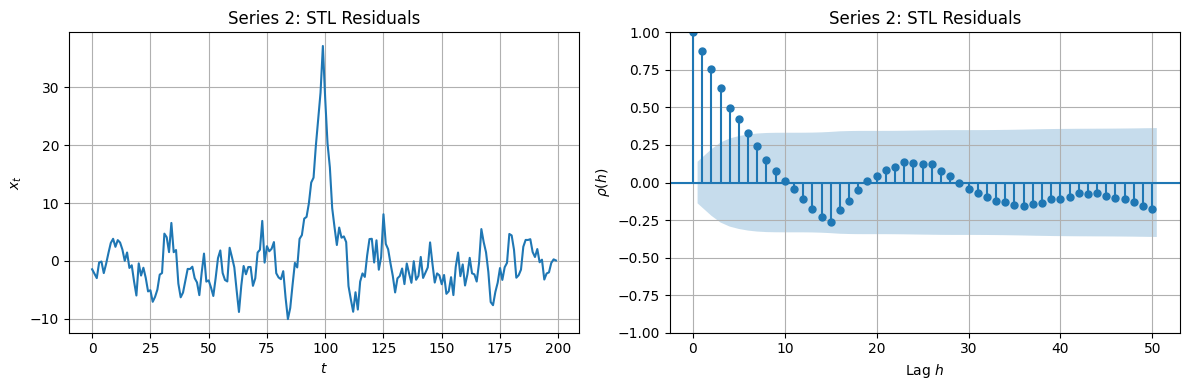

In [27]:
time_plot(np.arange(len(series_2_decomposed.resid)), series_2_decomposed.resid, title="Series 2: STL Residuals", with_acf=True, nlags=len(series_2_decomposed.resid) // 4)

In [28]:
stationarity_tests(series_2_decomposed.resid)

Stationarity Test Results:
	- ADF: Non-Stationary (p-value: 0.2366)
	- PP: Stationary (p-value: 0.0057)
	- KPSS: Stationary (p-value: 0.5265)
	- ZA: Non-Stationary (p-value: 0.5527)


Just using decomposition on series 2 does not yield stationary residuals. The ADF test indicates that there is a unit root in the series. Further transformations are needed to achieve stationarity.

In [29]:
series_2_diff = np.diff(series_2)
series_2_diff_decomposed: DecomposeResult = STL(series_2_diff, period=15).fit()

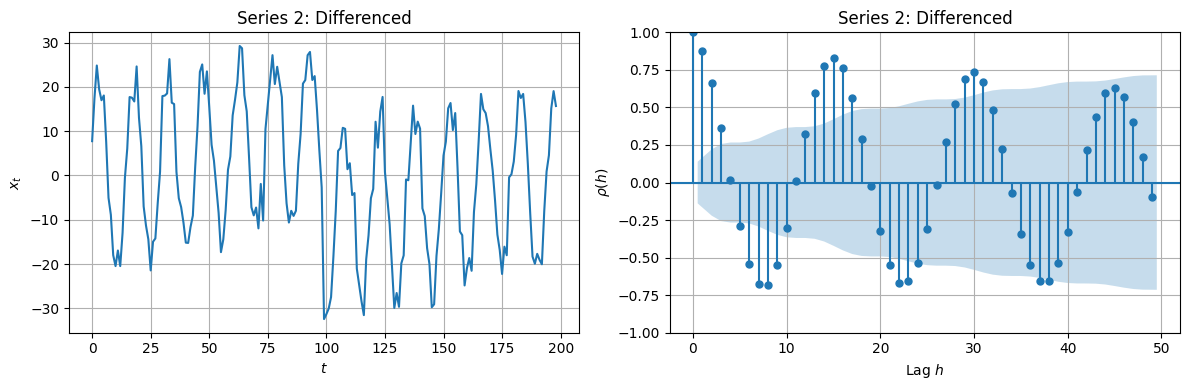

In [30]:
time_plot(np.arange(len(series_2_diff)), series_2_diff, title="Series 2: Differenced", with_acf=True, nlags=len(series_2_diff) // 4)

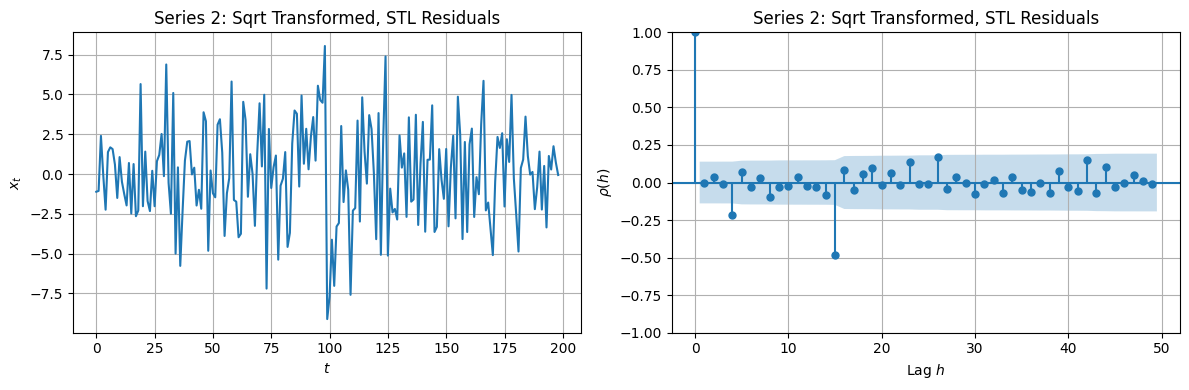

In [31]:
time_plot(np.arange(len(series_2_diff_decomposed.resid)), series_2_diff_decomposed.resid, title="Series 2: Sqrt Transformed, STL Residuals", with_acf=True, nlags=len(series_2_diff_decomposed.resid) // 4)

In [32]:
stationarity_tests(series_2_diff_decomposed.resid)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9952)
	- ZA: Stationary (p-value: 0.0000)


After first order differencing the series, the upward and downward trend is removed. The STL decomposition now removes the seasonal pattern alsomst perfectly and the residuals of the STL decomposition now appear stationary both visually and according to the ACF. All statistical tests confirm that the residuals are stationary.

#### Series 3

In [33]:
series_3_decomposed: DecomposeResult = STL(series_3, period=5).fit()

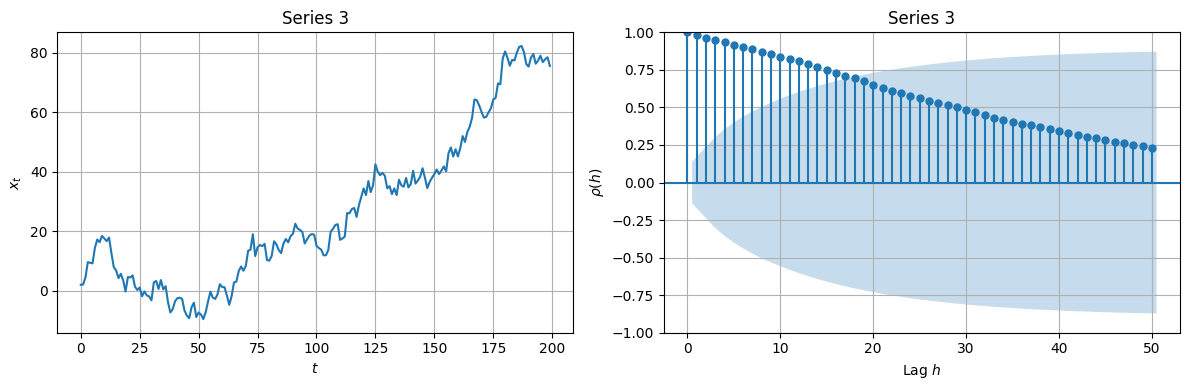

In [34]:
time_plot(np.arange(len(series_3)), series_3, title="Series 3", with_acf=True, nlags=len(series_3) // 4)

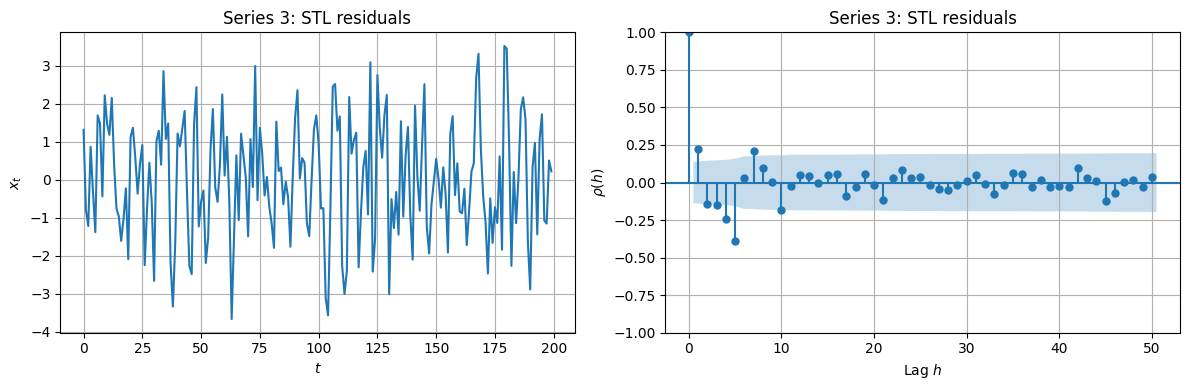

In [35]:
time_plot(np.arange(len(series_3_decomposed.resid)), series_3_decomposed.resid, title="Series 3: STL residuals", with_acf=True, nlags=len(series_3_decomposed.resid) // 4)

In [36]:
stationarity_tests(series_3_decomposed.resid)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9653)
	- ZA: Stationary (p-value: 0.0173)


For Series 3, the STL decomposition alone yields stationary residuals. This is apparent both through the visual inspection and the ACF. All statistical tests confirm that the residuals are stationary.

#### Pandas Refresher - ISE

The series is already (strictly) stationary, so no transformations are needed.

#### Pandas Refresher - Air Quality

In [37]:
df_pandas_refresher_aq_diff = df_pandas_refresher_aq['pm2_5_1_hr'].diff().dropna()

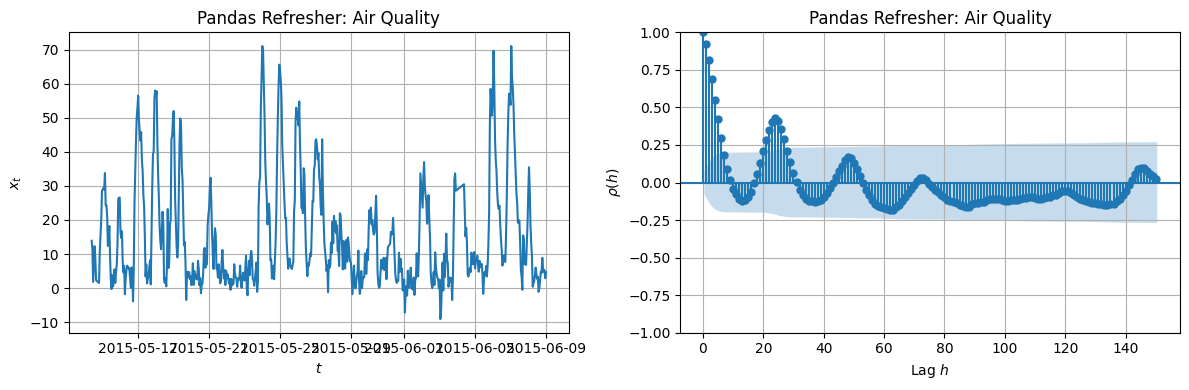

In [38]:
time_plot(df_pandas_refresher_aq.index, df_pandas_refresher_aq['pm2_5_1_hr'], title="Pandas Refresher: Air Quality", with_acf=True, nlags=len(df_pandas_refresher_aq) // 4)

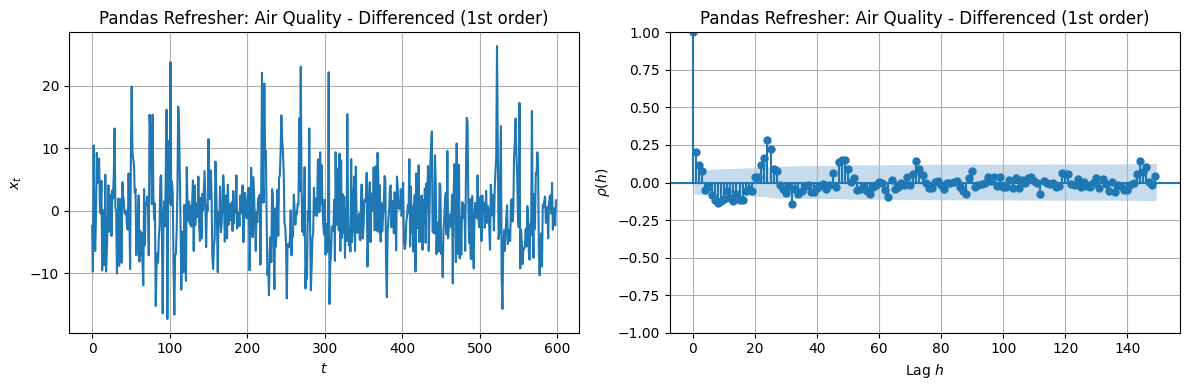

In [39]:
time_plot(np.arange(len(df_pandas_refresher_aq_diff)), df_pandas_refresher_aq_diff, title="Pandas Refresher: Air Quality - Differenced (1st order)", with_acf=True, nlags=len(df_pandas_refresher_aq_diff) // 4)

In [40]:
stationarity_tests(df_pandas_refresher_aq_diff)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.9981)
	- ZA: Stationary (p-value: 0.0000)


First order differencing clearly removes the cyclic decay in the ACF. The differenced series also appears stationary visually. All statistical tests confirm that the differenced series is stationary. Now the series can definitely be considered (weakly) stationary. This is once again backed up by all statistical tests.

#### Handling Missing Values: Energy Consumption

In [41]:
df_missing_values_energy_consumption_diff = df_missing_values_energy_consumption['energy_consumption'].diff().dropna()

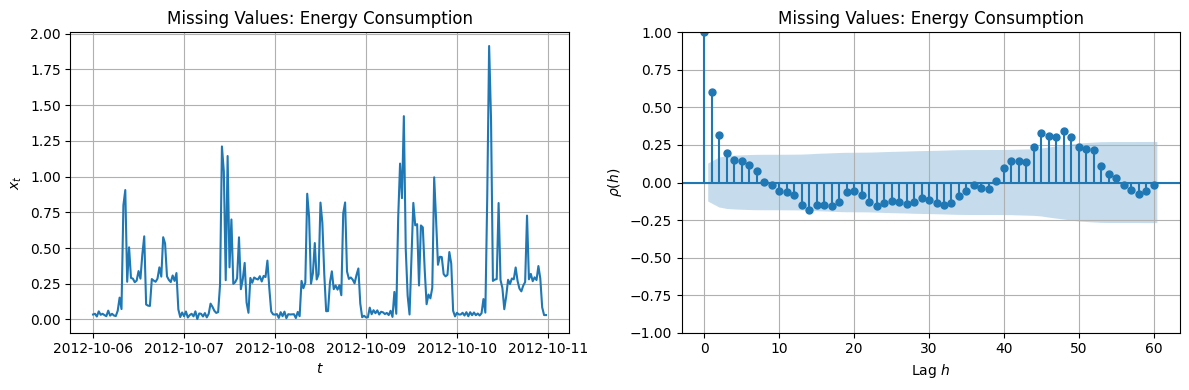

In [42]:
time_plot(df_missing_values_energy_consumption.index, df_missing_values_energy_consumption['energy_consumption'], title="Missing Values: Energy Consumption", with_acf=True, nlags=len(df_missing_values_energy_consumption) // 4)

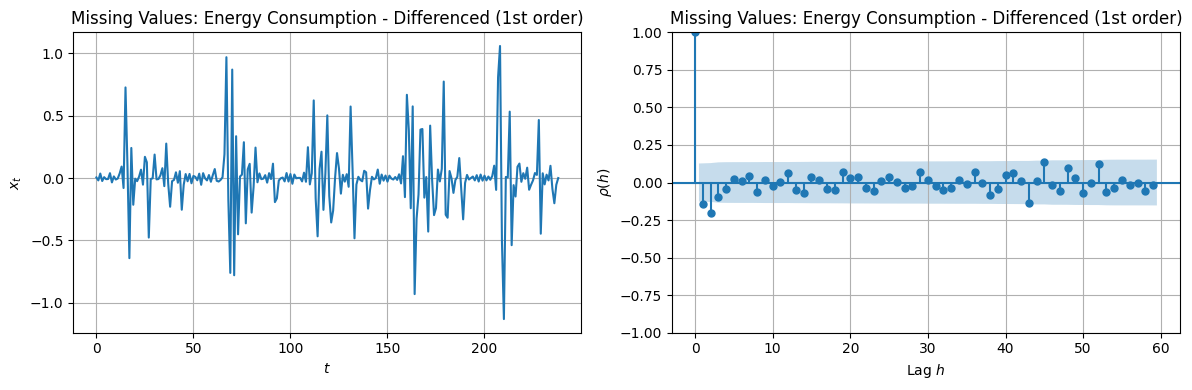

In [43]:
time_plot(np.arange(len(df_missing_values_energy_consumption_diff)), df_missing_values_energy_consumption_diff, title="Missing Values: Energy Consumption - Differenced (1st order)", with_acf=True, nlags=len(df_missing_values_energy_consumption_diff) // 4)

In [44]:
stationarity_tests(df_missing_values_energy_consumption_diff)

Stationarity Test Results:
	- ADF: Stationary (p-value: 0.0000)
	- PP: Stationary (p-value: 0.0000)
	- KPSS: Stationary (p-value: 0.3905)
	- ZA: Stationary (p-value: 0.0000)


Applying first order differencing removes the cyclic decay in the ACF. The differenced series also appears stationary visually. All statistical tests confirm that the differenced series is stationary. Now the series can definitely be considered (weakly) stationary. This is once again backed up by all statistical tests.

## 3. Explore artificial auto-correlations induced by differencing
* Start with a stationary time series.
* Apply differencing at various order.
* Compare ACF.

In [45]:
def difference(series: np.ndarray, order: int):
    output = np.array([2 ** k for k in range(int(np.sqrt(order)))])
    diffed = series
    for i in range(1, order + 1):
        diffed = np.diff(diffed)
        if i in output:
            time_plot(np.arange(len(diffed)), diffed, title=f"Stationary Series - Differenced (order {i})", with_acf=True, nlags=len(diffed) // 4)

In [49]:
np.random.seed(42)
stationary_series = np.random.normal(0, 1, 500)

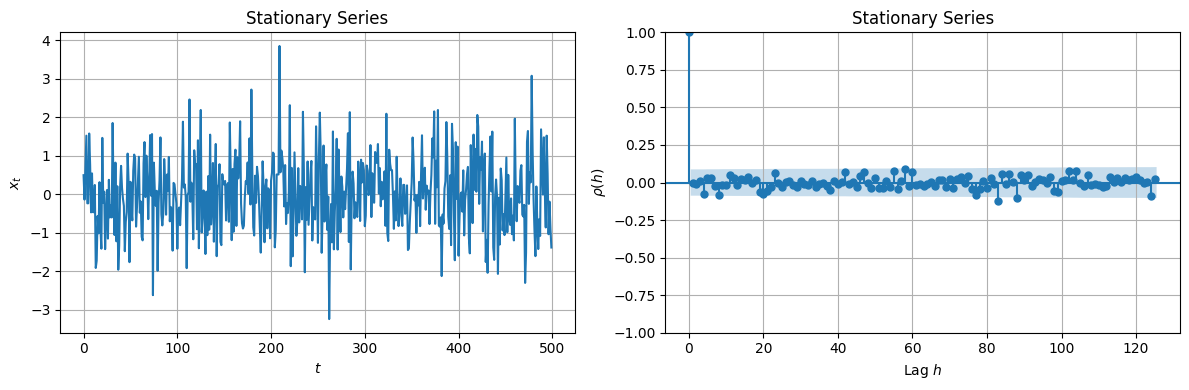

In [50]:
time_plot(np.arange(len(stationary_series)), stationary_series, title="Stationary Series", with_acf=True, nlags=len(stationary_series) // 4)

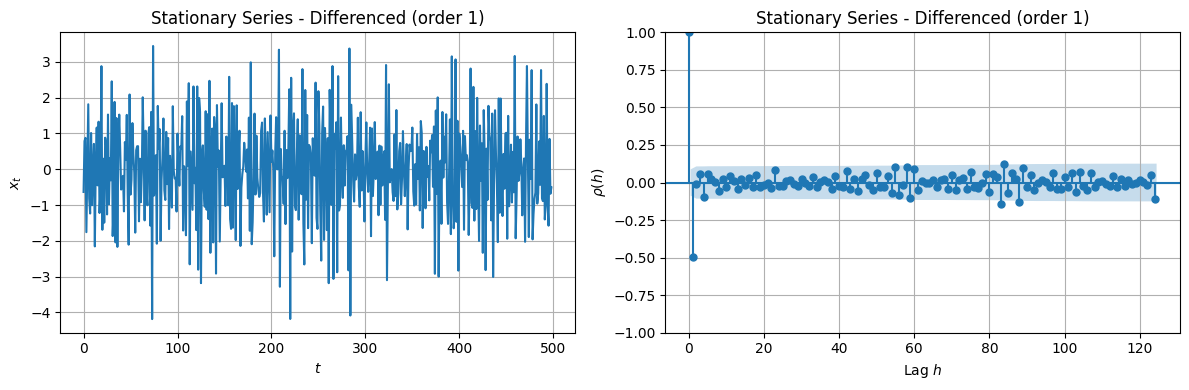

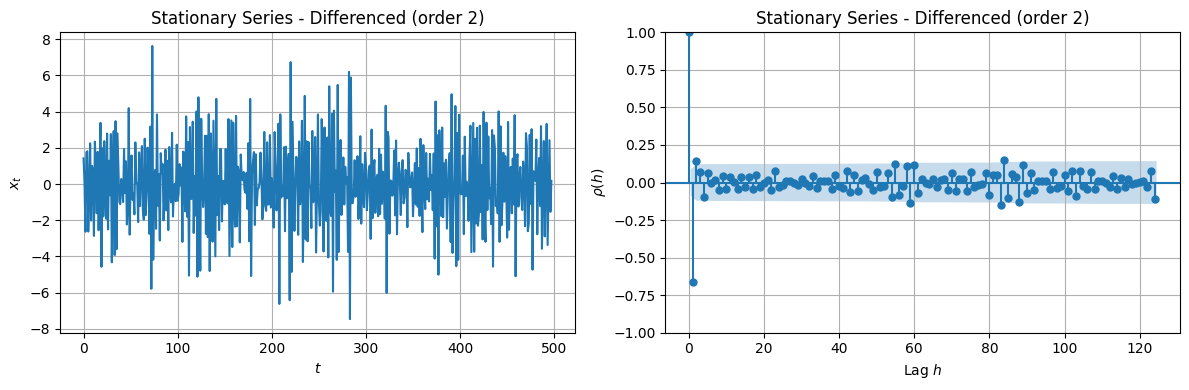

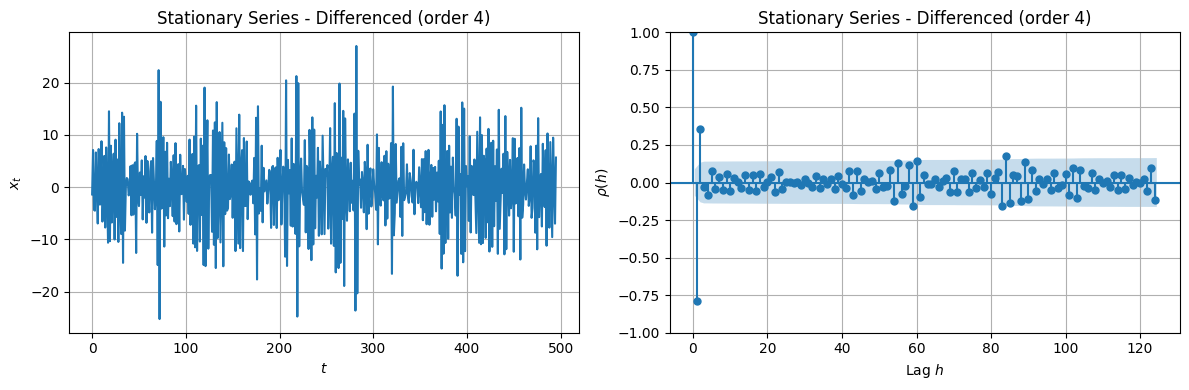

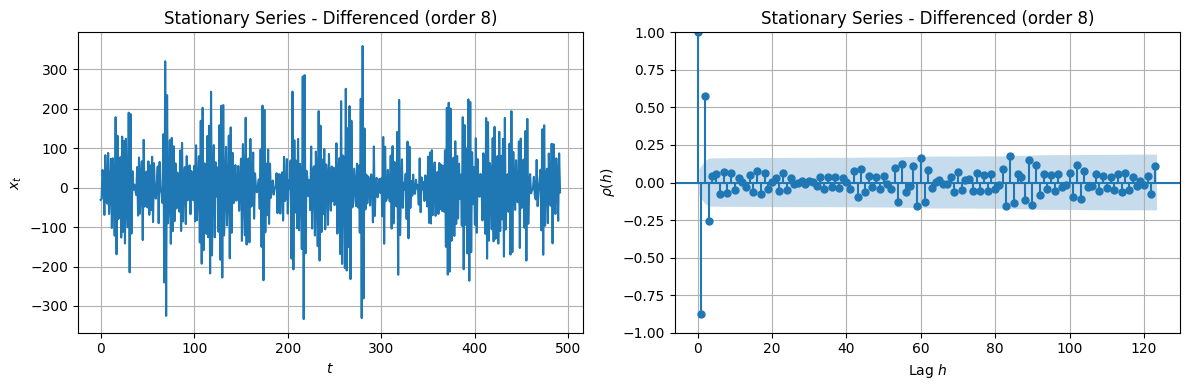

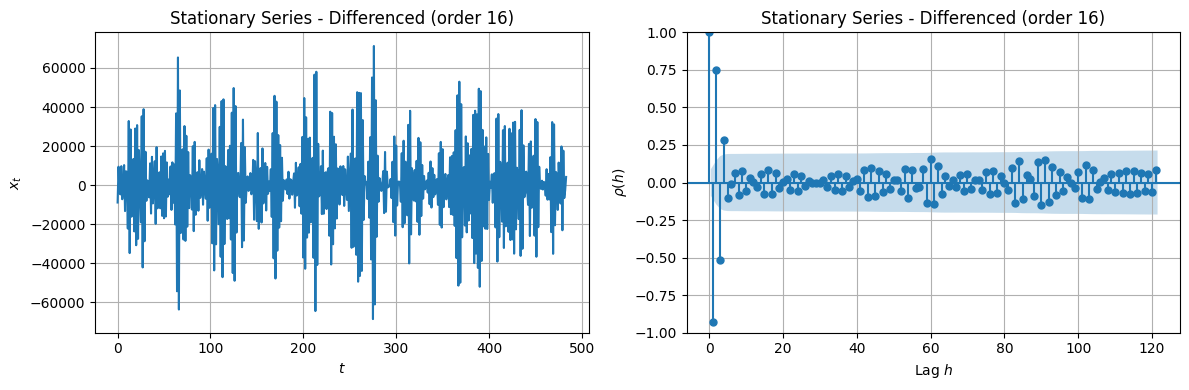

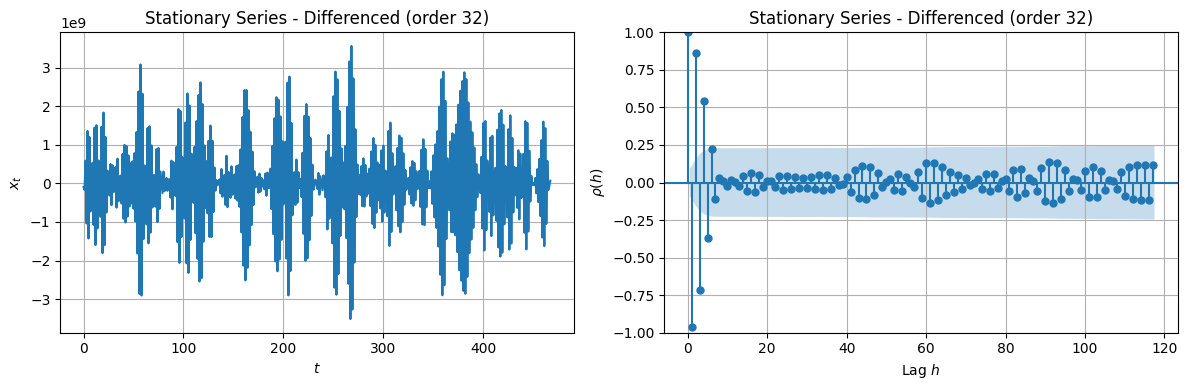

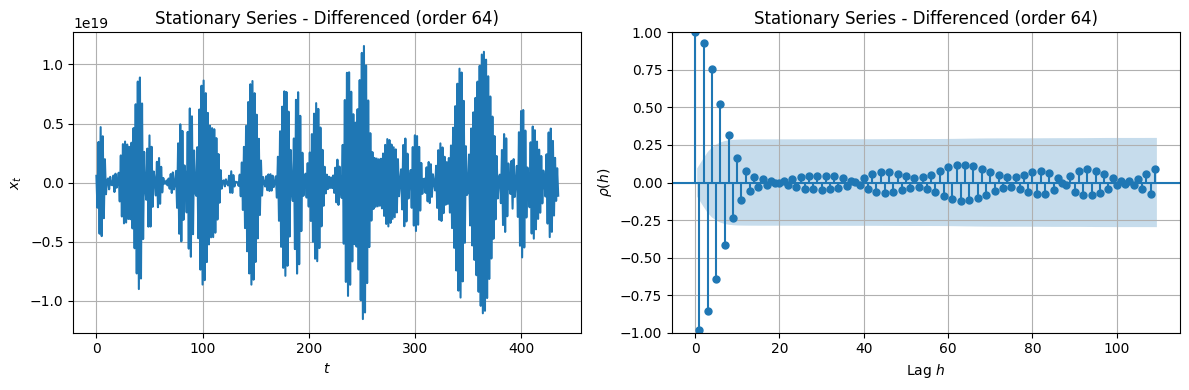

In [51]:
difference(stationary_series, 64)

The higher order differencing we apply, the more pronounced the artificial auto-correlations become. This is especially visible in the ACF plots, where a cyclic pattern emerges with increasing order of differencing. This is especially visible for the first few lags, but interestingly in this example also for higher lags. The magnitude of the auto-correlations also increases with higher order differencing. Furthermore, the absolute values of the differenced series become larger with increasing order of differencing.

Fun observation: By differencing order 64, the ACF shows very strong sinusoid patterns and the original white noise signal looks almost like an audio signal.